# Final Project - MNIST Classifier

### Import Libraries

In [1]:
import torch.nn
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

### Download training and testing data

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5), (0.5))])

# Download torchvisioni datasets into respective folders
trainset = torchvision.datasets.MNIST('./train_set', download=True, train=True, transform=transform)
testset = torchvision.datasets.MNIST('./test_set', download=True, train=False, transform=transform)

# Use 64 unique images for each dataload
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

15.2%

100.0%


Extracting ./train_set/MNIST/raw/train-images-idx3-ubyte.gz to ./train_set/MNIST/raw


100.0%
19.9%


Extracting ./train_set/MNIST/raw/train-labels-idx1-ubyte.gz to ./train_set/MNIST/raw



100.0%
100.0%


Extracting ./train_set/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train_set/MNIST/raw

Extracting ./train_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train_set/MNIST/raw



20.8%

100.0%


Extracting ./test_set/MNIST/raw/train-images-idx3-ubyte.gz to ./test_set/MNIST/raw


100.0%
43.7%


Extracting ./test_set/MNIST/raw/train-labels-idx1-ubyte.gz to ./test_set/MNIST/raw



100.0%
100.0%


Extracting ./test_set/MNIST/raw/t10k-images-idx3-ubyte.gz to ./test_set/MNIST/raw

Extracting ./test_set/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./test_set/MNIST/raw



### Create dataloaders and visualize some examples

torch.Size([64, 1, 28, 28])
torch.Size([64])


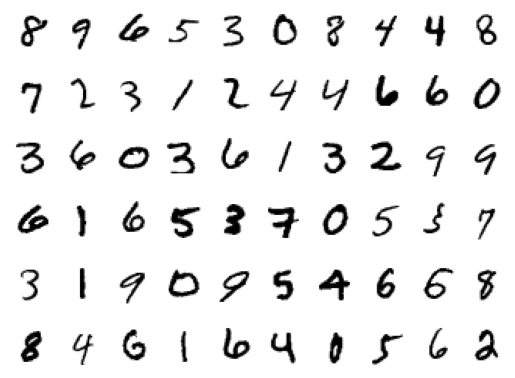

In [13]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

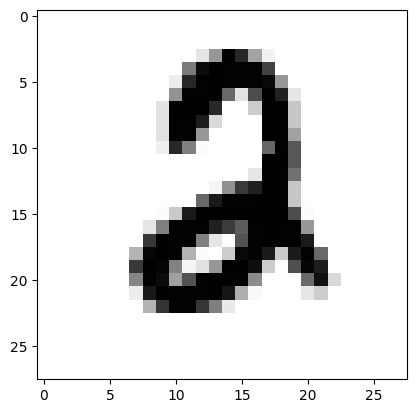

In [17]:
plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

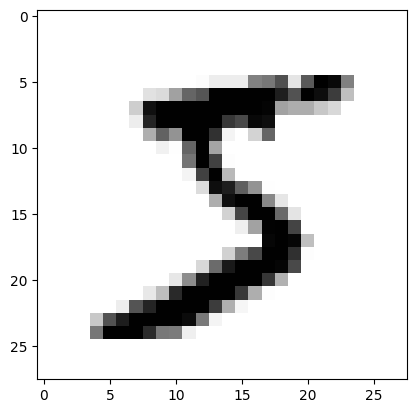

In [19]:
plt.imshow(trainset[0][0][0], cmap='gray_r')

### Model Initialization

In [20]:
# nn.Sequential is a type of nn.Module that allows for defining the nn in a sequential fashion
class Digit_Classifier(nn.Sequential):
  def __init__(self):
    super().__init__(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10))

In [ ]:
#Instantiate your model:
model = Digit_Classifier()

### Hyperparameters Tuning

In [ ]:
#hyperparameters: currently all are set to 1, it is up to you to figure out what they should be
#Don't just randomly change the hyperparameters: consider what each of them are changing (look in the code to find where the actually affect things)
num_epochs = 20
learning_rate = 0.1
momentum = 1
criterion = nn.CrossEntropyLoss() #consider using other loss functions: https://pytorch.org/docs/stable/nn.html#loss-functions
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) #consider using other optimizers: https://pytorch.org/docs/stable/optim.html#algorithms